## Build your own recommendation system for products on an e-commerce website like Amazon.com. 

* Dataset columns - first three columns are userId, productId, and ratings and the fourth column is timestamp. You can discard the timestamp column as in this case you may not need to use it.

* Source - Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/).

* Dataset Link - https://drive.google.com/file/d/1ClBptsK3V5KgKXtK2GSRzFNAW7GnTPDW/view?usp=sharing

### 1.Read and explore the given dataset.  ( Rename column/add headers, plot histograms, find data characteristics)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
amazon_cols = ['userId', 'productId', 'ratings', 'timestamp']
amazon_cols_required = ['userId', 'productId', 'ratings']
amazon = pd.read_csv("ratings_Electronics.csv", names=amazon_cols, usecols=amazon_cols_required)
amazon.head()

,userId,productId,ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [3]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
userId       object
productId    object
ratings      float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [4]:
amazon.ratings = amazon.ratings.astype('int32')

In [5]:
amazon.describe()

,ratings
count,7.824482e+06
mean,4.012337e+00
std,1.380910e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


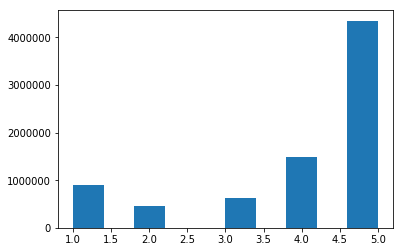

In [6]:
plt.hist(amazon['ratings'])
plt.show()

### 2.Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )

In [7]:
df_higher_rate = amazon.loc[amazon['ratings'] > 4] 
df = df_higher_rate.reset_index(drop=True)

### 3.Split the data randomly into train and test dataset ( For example, split it in 70/30 ratio)

In [8]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size = 0.30, random_state=0)

### 4.Build Popularity Recommender model.

In [9]:
def recommendation(data):
    product_grouped_by_rating = df.groupby(['productId']).agg({'ratings': 'count'}).reset_index()
    product_sorted_by_rating = product_grouped_by_rating.sort_values(['ratings'], ascending = False) # ratings in descending order
    popularity_recommendataions = product_sorted_by_rating.head(15).reset_index(drop=True)
    return popularity_recommendataions['productId']

In [10]:
print(recommendation(train_data))

0     B0074BW614
1     B007WTAJTO
2     B0019EHU8G
3     B003ES5ZUU
4     B00DR0PDNE
5     B006GWO5WK
6     B007R5YDYA
7     B003ELYQGG
8     B000LRMS66
9     B0002L5R78
10    B00622AG6S
11    B003LR7ME6
12    B008OHNZI0
13    B009SYZ8OC
14    B00BGA9WK2
Name: productId, dtype: object


In [11]:
print(recommendation(test_data))

0     B0074BW614
1     B007WTAJTO
2     B0019EHU8G
3     B003ES5ZUU
4     B00DR0PDNE
5     B006GWO5WK
6     B007R5YDYA
7     B003ELYQGG
8     B000LRMS66
9     B0002L5R78
10    B00622AG6S
11    B003LR7ME6
12    B008OHNZI0
13    B009SYZ8OC
14    B00BGA9WK2
Name: productId, dtype: object


In [12]:
# since it is popularity based recommendation system, it returns the same list of the popular products for all users

### 5.Build Collaborative Filtering model.

In [13]:
collaborative_filter = pd.concat([train_data, test_data]).reset_index()
collaborative_filter = collaborative_filter.head(10000)
collaborative_filter.head()

,index,userId,productId,ratings
0,3449268,AE5JSLPAD07P4,B008GVZKK0,5
1,795996,A2H629SI5VJGRM,B000VY2BC0,5
2,3449400,A1FGB6DIW59I6Q,B008GWL19I,5
3,3050165,ALV2NT16V4QR6,B006ZZUK5Y,5
4,470483,A2CPGY0ZV6FZXC,B000EOPQ7E,5


In [14]:
pivot_df= collaborative_filter.pivot(index = 'userId', columns ='productId', values = 'ratings').fillna(0)
pivot_df.head()

productId,140053271X,1400532736,3744295508,9985686764,9989360391,B000001OM4,B00000DM9W,B00000J060,B00000J061,B00000J1GA,...,B00JUSX9M4,B00K4UIO9K,B00K5M6ARA,B00K5QBF2G,B00K6ZFBGC,B00K73NSXQ,B00KCAFSFU,B00KCT3PCO,B00KFW5PJO,B00KKPQFUE
userId,,,,,,,,,,,,,,,,,,,,,
A017408633KRQ6FHC7ERP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0269980Q6K7E9SH4XN9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A04199503VX2UQSCQ5J37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A05019592OEL0Y8K48S80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0526512ZYHLOOAN1SI9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
pivot_df.shape

(9949, 7667)

In [18]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(pivot_df, k = 50)
sigma = np.diag(sigma)

In [21]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
predictions_df = pd.DataFrame(all_user_predicted_ratings, columns = pivot_df.columns)
predictions_df.head()

productId,140053271X,1400532736,3744295508,9985686764,9989360391,B000001OM4,B00000DM9W,B00000J060,B00000J061,B00000J1GA,...,B00JUSX9M4,B00K4UIO9K,B00K5M6ARA,B00K5QBF2G,B00K6ZFBGC,B00K73NSXQ,B00KCAFSFU,B00KCT3PCO,B00KFW5PJO,B00KKPQFUE
0,7.365945e-35,1.752037e-37,-2.025120e-34,-1.984814e-34,3.167886e-35,-8.432197e-35,1.677582e-34,-6.179670e-35,9.893309e-35,-4.319952e-35,...,-1.893883e-34,1.733925e-34,-2.728583e-36,4.929146e-35,1.421458e-34,-1.019071e-35,-1.422904e-34,1.826073e-34,8.019988e-36,-1.065673e-34
1,3.870209e-34,9.006946e-37,-9.714479e-34,-9.878397e-34,1.311802e-34,-3.631905e-34,9.252796e-34,-2.748487e-34,4.073195e-34,-2.743832e-34,...,-1.035824e-33,7.736363e-34,-1.394098e-35,2.560465e-34,7.040749e-34,-5.519804e-35,-5.727059e-34,8.238089e-34,4.088317e-35,-4.884616e-34
2,-1.308106e-33,-2.416711e-36,4.876040e-33,6.481936e-33,-7.054561e-34,3.493891e-33,-4.770501e-33,1.827758e-33,-5.354974e-33,5.566122e-34,...,7.290633e-33,-7.197713e-33,7.498289e-35,-1.216664e-33,-4.407669e-33,2.657329e-34,3.799105e-33,-5.251016e-33,-1.968669e-34,3.155658e-33
3,5.520163e-18,1.245734e-20,-1.274606e-17,-1.304449e-17,1.750376e-18,-4.394365e-18,1.277721e-17,-3.654499e-18,4.720844e-18,-4.076435e-18,...,-1.386123e-17,9.909536e-18,-2.130542e-19,3.530308e-18,9.567670e-18,-7.641261e-19,-7.388246e-18,1.099468e-17,5.376747e-19,-6.385044e-18
4,1.275337e-18,2.295125e-21,-2.318438e-18,-2.004763e-18,3.720411e-19,-9.200300e-19,3.030577e-18,-8.730798e-19,1.186367e-18,-8.928936e-19,...,-2.737090e-18,1.614996e-18,-4.261996e-20,7.538340e-19,2.386425e-18,-1.578329e-19,-1.412264e-18,2.597508e-18,1.186645e-19,-1.671027e-18


In [ ]:
def recommend(predictions_df, userID, movies_df, original_ratings_df, num_recommendations=5):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1 # UserID starts at 1, not 0
    sorted_user_predictions = predictions_df.iloc[user_row_number].sort_values(ascending=False)
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings_df[original_ratings_df.userId == (userID)]
    #Added title and genres
    user_full = (user_data.merge(movies_df, how = 'left', left_on = 'movieId', right_on = 'movieId').
                     sort_values(['rating'], ascending=False)
                 )

    print ('User {0} has already rated {1} movies.'.format(userID, user_full.shape[0]))
    print ('Recommending the highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    # select the movie which are in user list and remove those movies from our movies list
    # Then merge with the sorted user predictions with the movieIds with left join
    # Rename the columns to 'predictions'
    recommendations = (movies_df[~movies_df['movieId'].isin(user_full['movieId'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left', left_on = 'movieId', right_on = 'movieId').
         rename(columns = {user_row_number: 'Predictions'}))
    #sort the prediction values
    recommendations = (recommendations.sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations, sorted_user_predictions, user_data, user_full

### 6.Evaluate both the models. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models.

### 7.Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.

### 8.Summarise your insights.